### 1.Sınavlardaki performans cinsiyete, kökene ve anne-baba eğitim durumuna göre değişiklik göstermekte midir?

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
import statsmodels.api as sm

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [3]:
students = pd.read_csv("StudentsPerformance.csv")
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


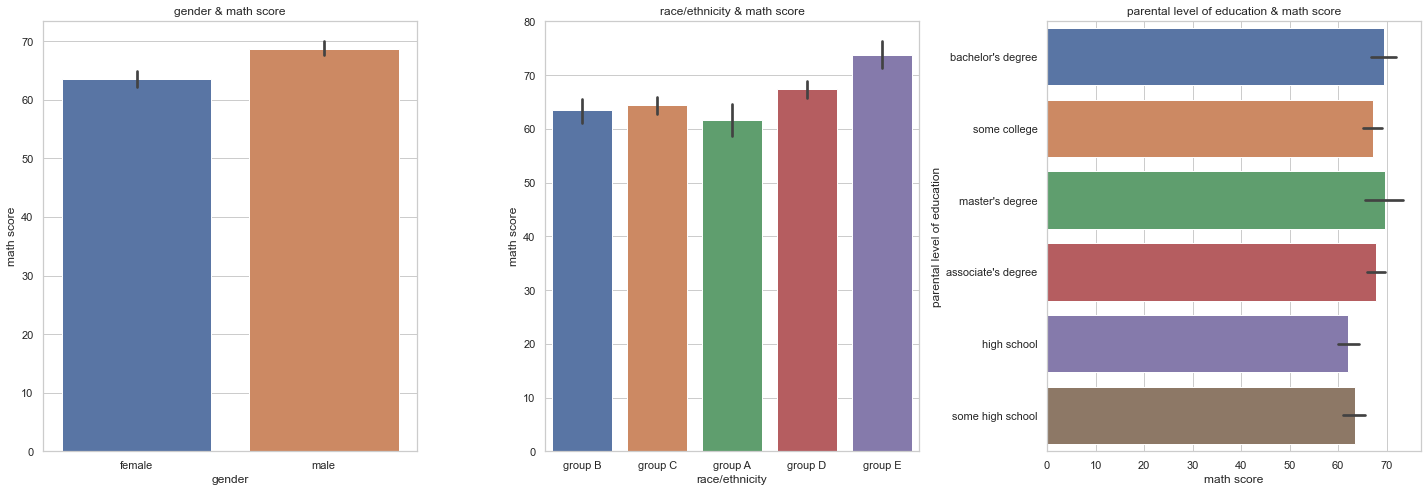

In [4]:
## math scoru için:

plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.barplot("gender","math score" , data=students)
plt.title("gender & math score")

plt.subplot(1,3,2)
sns.barplot("race/ethnicity" , "math score", data=students)
plt.title("race/ethnicity & math score")

plt.subplot(1,3,3)
sns.barplot(y="parental level of education",x="math score", data=students)
plt.title("parental level of education & math score")

plt.tight_layout()

plt.show()

In [ ]:
# grafiklere bakarak:
# 1.grafik : erkekler math scoru için daha basarılı
# 2.grafik : group E etnik kökenli oalnlar daha basarılı
# 3.grafik :ebeveynleri lisans ve master mezunu olanlar daha basarılı

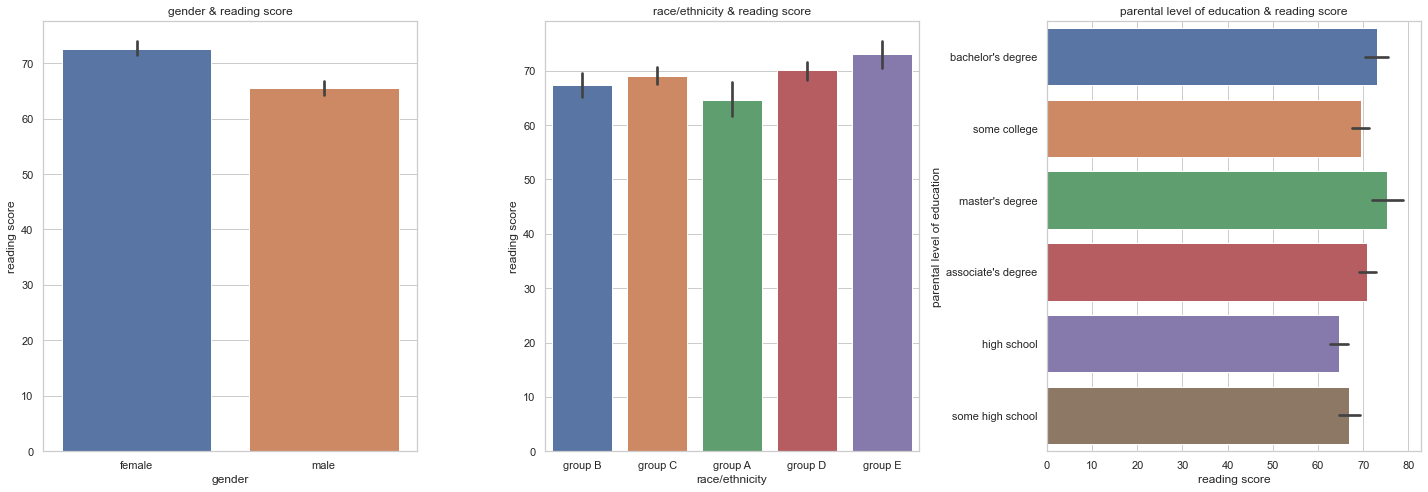

In [119]:
## reading score için:

plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.barplot("gender","reading score" , data=students)
plt.title("gender & reading score")

plt.subplot(1,3,2)
sns.barplot("race/ethnicity" , "reading score", data=students)
plt.title("race/ethnicity & reading score")

plt.subplot(1,3,3)
sns.barplot(y="parental level of education",x="reading score", data=students)
plt.title("parental level of education & reading score")

plt.tight_layout()

plt.show()

In [ ]:
#grafiklere bakarak:
#reading scoru için kadınların,
#etnik kökeni E olanların,
#ebeveyni master mezunu olanların daha basarılı oldugu görülüyor

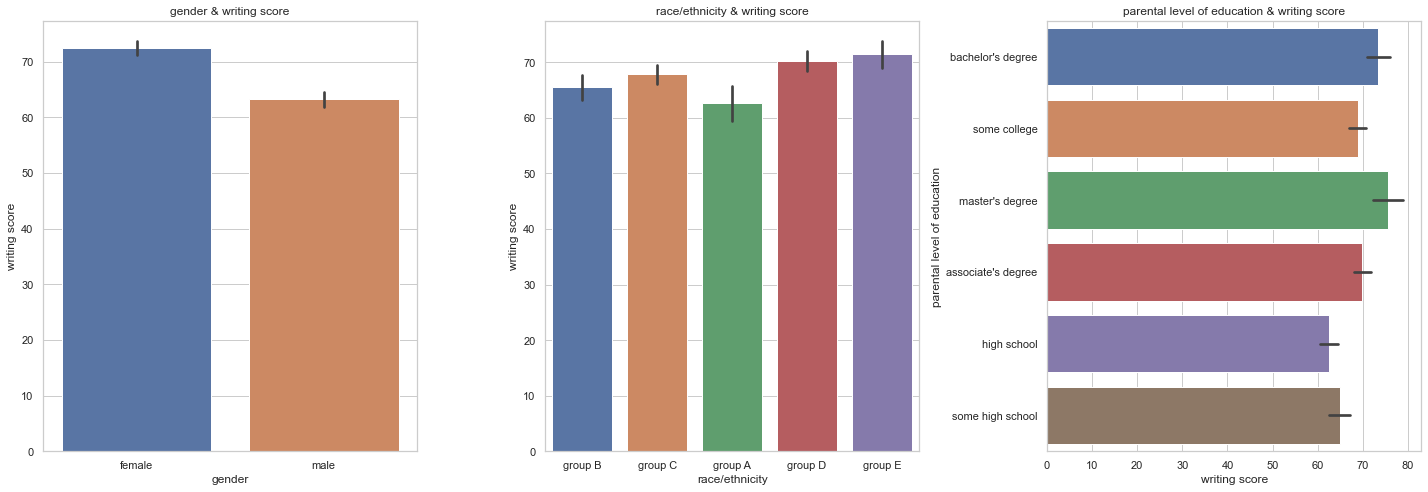

In [120]:
## writing score için:

plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.barplot("gender","writing score" , data=students)
plt.title("gender & writing score")

plt.subplot(1,3,2)
sns.barplot("race/ethnicity" , "writing score", data=students)
plt.title("race/ethnicity & writing score")

plt.subplot(1,3,3)
sns.barplot(y="parental level of education",x="writing score", data=students)
plt.title("parental level of education & writing score")

plt.tight_layout()

plt.show()

In [ ]:
#grafiklere bakarak:
# diğer reading scorunda oldugu gibi kadın,group e ve ebeveyni master mezunu olan öğrenciler daha basarılı.

In [ ]:
# simdi de istatiksel olarak baktığımızda:
# tüm ders skorları için gender değişkenini değerlendirdiğimizde anlamlı bir farklılık yoktur diyemeyiz.

In [113]:
for var in ["math score","reading score","writing score"]:
    karsilastirma = pd.DataFrame(columns=['female', 'male','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end=' ')
    
    ttest = stats.ttest_ind(students[students["gender"]=="female"][var],students[students["gender"]=="male"][var])
    female = "female"
    male = "male"
    istatistik = ttest[0]               
    p_degeri = ttest[1]
            
    karsilastirma = karsilastirma.append({"female" : female,
                                                  "male" : male ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

math score için karşılaştırma 

,female,male,istatistik,p_degeri
0,female,male,-5.383245869828983,0.000000091201855


reading score için karşılaştırma 

,female,male,istatistik,p_degeri
0,female,male,7.959308005187657,0.000000000000005


writing score için karşılaştırma 

,female,male,istatistik,p_degeri
0,female,male,9.979557910004507,0.000000000000000


In [ ]:
# race/ethnicity degişkeni için t istatiği ve p value degerlerini incelersek:

# math scoru için A,B,C grupları arasında anlamlı bir fark yoktur aynı şekilde D,E grupları arasında da anlamlı fark yoktur. 

# reading scoru için: B,C,D grupları arasında anlamlı bir fark yokken geriye kalan:
#A tüm gruplardan anlamlı olarak farklıdır,E tüm gruplardan anlamlı olarak farklıdır. 

# writing scoru için A ve B arasında,B ve C arasında ,C ve D arasında,D ve E arasında anlamlı fark yoktur diyebiliriz.

In [114]:
gruplar = students["race/ethnicity"].unique()
grup_students = students.groupby("race/ethnicity")
 
pd.options.display.float_format = '{:.15f}'.format

for var in ["math score","reading score","writing score"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    
    for i in range(0, len(gruplar)):
        for j in range(i+1, len(gruplar)):
            ttest = stats.ttest_ind(students[students["race/ethnicity"]==gruplar[i]][var], 
                                students[students["race/ethnicity"]==gruplar[j]][var])
            grup_1 = gruplar[i]
            grup_2 = gruplar[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)
            
      

math score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-0.731566989353426,0.464770893916745
1,group B,group A,0.935507627974749,0.350341596165996
2,group B,group D,-2.828455397126750,0.004886197137104
3,group B,group E,-6.007397050552227,0.000000005007946
4,group C,group A,1.599722030321730,0.110438107455880
5,group C,group D,-2.418586247460110,0.015888349556016
6,group C,group E,-6.127642520822135,0.000000001927239
7,group A,group D,-3.346698242971230,0.000906863605354
8,group A,group E,-5.936141025544798,0.000000010835591
9,group D,group E,-4.282287214674715,0.000023187640327


reading score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-1.322315621290177,0.186659280903507
1,group B,group A,1.363368226202768,0.173873551344372
2,group B,group D,-1.945156363686479,0.052378620655970
3,group B,group E,-3.386066945409153,0.000795161849524
4,group C,group A,2.575432218066352,0.010364398025471
5,group C,group D,-0.797010931640892,0.425771382113019
6,group C,group E,-2.713301864537168,0.006913284280499
7,group A,group D,-3.046854857346119,0.002488654464332
8,group A,group E,-4.071106227981414,0.000064633959318
9,group D,group E,-2.010647940603179,0.045033306431346


writing score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-1.596496343374041,0.111001095981452
1,group B,group A,1.462442057799811,0.144753741989939
2,group B,group D,-3.199293332325260,0.001474997888132
3,group B,group E,-3.383197834524452,0.000803230048635
4,group C,group A,2.848872404992454,0.004610690740740
5,group C,group D,-1.889663151672625,0.059302329187082
6,group C,group E,-2.350281186835918,0.019183539018898
7,group A,group D,-4.155631636144919,0.000040848057340
8,group A,group E,-4.223473663197010,0.000034832780645
9,group D,group E,-0.823973657152092,0.410445551739226


In [ ]:
# parental level of education değişkeni üzerinden t istatistiği ve p value ele alınarak scorlar incelenirse:
# math scoru için: 
# master's degree,bachelor's degree,some college,associate's degree grupları ve
# some high school,high school grupları arasında anlamlı fark yoktur diyebiliriz.

# reading scoru için:
# master's degree,bachelor's degree arasında,some college,associate's degree,some high school arasında,
# some high school,high school arasında anlamlı fark yoktur.

# writing scoru için:
# master's degree,bachelor's degree arasında,some college,associate's degree arasında ,some high school,high school
# arasında anlamlı fark yoktur diyebiliriz.

In [118]:
degrees = students["parental level of education"].unique()
parent_groups = students.groupby("parental level of education")
pd.options.display.float_format = '{:.15f}'.format

for var in ["math score","reading score","writing score"]:
    
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(degrees)):
        for j in range(i+1, len(degrees)):
            ttest = stats.ttest_ind(students[students["parental level of education"]==degrees[i]][var], 
                                students[students["parental level of education"]==degrees[j]][var])
            grup_1 = degrees[i]
            grup_2 = degrees[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)
    

math score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,bachelor's degree,some college,1.370235282961748,0.171512242184716
1,bachelor's degree,master's degree,-0.148681965688493,0.881975782486770
2,bachelor's degree,associate's degree,0.878664188979324,0.380207578180362
3,bachelor's degree,high school,4.236143622484822,0.000029965345854
4,bachelor's degree,some high school,3.196718602676573,0.001540919292281
5,some college,master's degree,-1.235633421582457,0.217619568103474
6,some college,associate's degree,-0.542684269624753,0.587618280923407
7,some college,high school,3.546107949568116,0.000434980041925
8,some college,some high school,2.411704623140763,0.016324361572646
9,master's degree,associate's degree,0.841122968856347,0.400999363612466


reading score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,bachelor's degree,some college,2.204882120908508,0.028127555314401
1,bachelor's degree,master's degree,-1.054085894947598,0.293296751317879
2,bachelor's degree,associate's degree,1.297796985045283,0.195242064830911
3,bachelor's degree,high school,5.017577900835298,0.000000880425031
4,bachelor's degree,some high school,3.403927067379874,0.000756197171973
5,some college,master's degree,-2.888843374950649,0.004165440800640
6,some college,associate's degree,-1.112318821691490,0.266600285399801
7,some college,high school,3.457842768362033,0.000600104848125
8,some college,some high school,1.714161972758909,0.087267868562439
9,master's degree,associate's degree,2.191201575983869,0.029264145709722


writing score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,bachelor's degree,some college,2.680331468463220,0.007711012023673
1,bachelor's degree,master's degree,-0.999874130680484,0.318751964146466
2,bachelor's degree,associate's degree,2.115929663913376,0.035081624517197
3,bachelor's degree,high school,6.547380937127048,0.000000000240763
4,bachelor's degree,some high school,4.667733097498242,0.000004628198527
5,some college,master's degree,-3.168769063239491,0.001698593313596
6,some college,associate's degree,-0.761596864395391,0.446703166030366
7,some college,high school,4.488520877492127,0.000009275017803
8,some college,some high school,2.575721140379242,0.010358529086081
9,master's degree,associate's degree,2.781241549068550,0.005784032705258


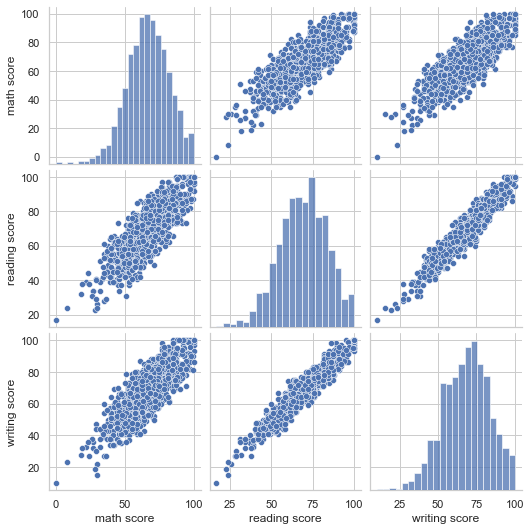

In [85]:
sns.pairplot(students)     #3 score da birbirleriyle pozitif ilişkili
plt.show()

### 2.Öğle yemek tipinin sınav performansları ile bir ilişkisi var mı? Varsa bunu nasıl açıklayabilirsiniz?

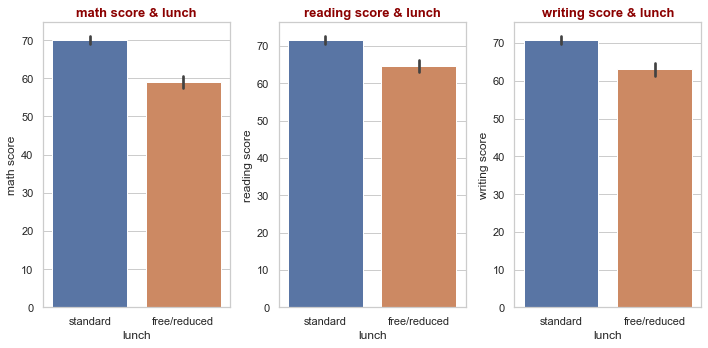

In [59]:
plt.figure(figsize=(10,5))                               #3 score için de standart öğle yemeğine sahip öğrenciler daha basarılı
plt.subplot(131)
sns.barplot("lunch","math score",data=students)
plt.title("math score & lunch",fontdict=baslik_font)

plt.subplot(132)
sns.barplot("lunch","reading score",data=students)
plt.title("reading score & lunch",fontdict=baslik_font)

plt.subplot(133)
sns.barplot("lunch","writing score",data=students)
plt.title("writing score & lunch",fontdict=baslik_font)

plt.tight_layout()
plt.show()

In [137]:
ms = stats.ttest_ind(students[students["lunch"]=="standard"]["math score"],  # math scoru için öğle yemegi standard ve 
                                                                               #free/reduced olan öğrenciler arasında anlamlı
                     students[students["lunch"]=="free/reduced"]["math score"])     # bir fark yoktur diyemeyiz.
print("math score için: {}".format(ms))

math score için: Ttest_indResult(statistic=11.837180472914612, pvalue=2.4131955993137074e-30)


In [134]:
rs = stats.ttest_ind(students[students["lunch"]=="standard"]["reading score"],  # reading scoru için öğle yemegi standard ve 
                students[students["lunch"]=="free/reduced"]["reading score"])   #free/reduced olan öğrenciler arasında anlamlı
print("reading score için: {}".format(rs))                                         # bir fark yoktur diyemeyiz.

reading score için: Ttest_indResult(statistic=7.451056467473455, pvalue=2.0027966545279011e-13)


In [135]:
ws = stats.ttest_ind(students[students["lunch"]=="standard"]["writing score"],     # writing scoru için öğle yemegi standard ve 
                students[students["lunch"]=="free/reduced"]["writing score"])     #free/reduced olan öğrenciler arasında anlamlı
print("writing score için: {}".format(ws))                                         # bir fark yoktur diyemeyiz.

writing score için: Ttest_indResult(statistic=8.009784197834758, pvalue=3.186189583166477e-15)


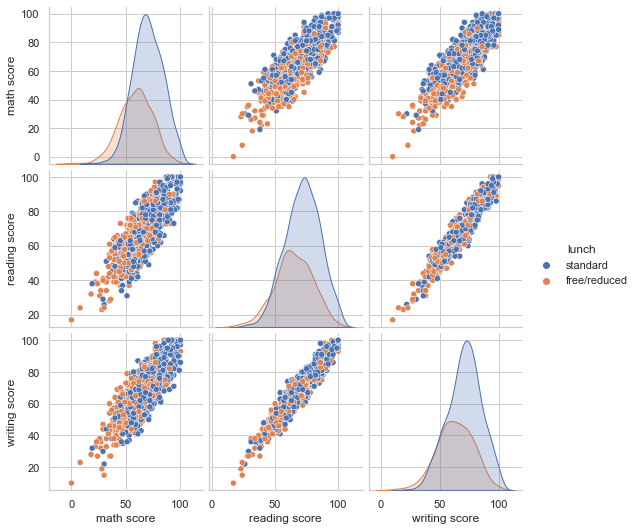

In [80]:
sns.pairplot(students,hue="lunch")
plt.show()

### 3.Hazırlık kurslarının sonav performansı üzerinde bir etkisi var mı?

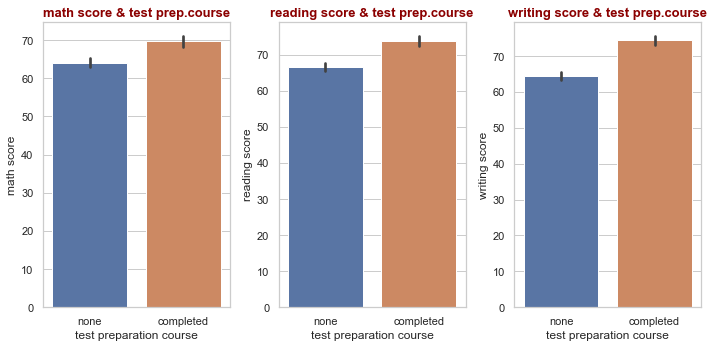

In [63]:

plt.figure(figsize=(10,5))                               #3 score için de kurs alan öğrenciler daha basarılı
plt.subplot(131)
sns.barplot("test preparation course","math score",data=students)
plt.title("math score & test prep.course",fontdict=baslik_font)

plt.subplot(132)
sns.barplot("test preparation course","reading score",data=students)
plt.title("reading score & test prep.course",fontdict=baslik_font)

plt.subplot(133)
sns.barplot("test preparation course","writing score",data=students)
plt.title("writing score & test prep.course",fontdict=baslik_font)

plt.tight_layout()
plt.show()


### 4.Birbiriyle korelasyonu en fazla olan dersler hangisidir?

In [66]:
s_corr = students.corr()
s_corr

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


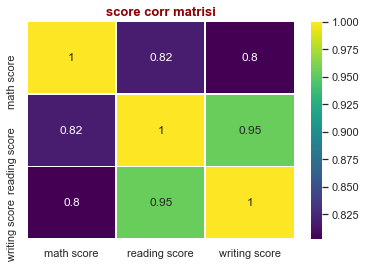

In [73]:
sns.heatmap(s_corr,annot=True,linewidth=0.7,cmap="viridis")
plt.title("score corr matrisi",fontdict=baslik_font)             #aralarında en cok korelasyon bulunan değişkenler 0.95 ile 
                                                                 #reading score ve writing score
plt.show()